# 🧭 Campus Navigation System using BFS and DFS

This project simulates a **Campus Navigation System** using graph traversal:
- **BFS (Breadth-First Search)** for finding the shortest route.
- **DFS (Depth-First Search)** for exploring all possible routes.

Each location is a **node**, and paths between them are **edges**.


1)Create the CampusGraph Class
   -

In [4]:
class CampusGraph:
    def __init__(self):
        # Dictionary to store connections between locations
        self.graph = {}

    # Add a new location to the campus map
    def add_location(self, location):
        if location not in self.graph:
            self.graph[location] = []

    # Add a path (connection) between two locations
    def add_path(self, place1, place2):
        self.graph[place1].append(place2)
        self.graph[place2].append(place1)  

    # Use BFS to find the shortest path between two locations
    def bfs_shortest_path(self, start, end):
        visited = []         
        queue = [[start]]   

        if start == end:
            return [start]

        while queue:
            path = queue.pop(0)
            current_place = path[-1]

            if current_place not in visited:
                for neighbor in self.graph[current_place]:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)

                    if neighbor == end:
                        return new_path
                visited.append(current_place)
        return None

    # Use DFS to find all possible paths between two locations
    def dfs_all_paths(self, start, end):
        all_paths = []

        def dfs(current, path, visited):
            visited.add(current)
            path.append(current)

            if current == end:
                all_paths.append(list(path))
            else:
                for neighbor in self.graph[current]:
                    if neighbor not in visited:
                        dfs(neighbor, path, visited)

            path.pop()
            visited.remove(current)

        dfs(start, [], set())
        return all_paths

    # Display the campus map
    def display_graph(self):
        print("Campus Map:")
        for place in self.graph:
            print(place, "->", self.graph[place])


2)Create the Campus Map
-

In [12]:
# Create the graph object
campus = CampusGraph()

# Add locations (nodes)
campus.add_location("Library")
campus.add_location("Cafeteria")
campus.add_location("Lecture Hall")
campus.add_location("Lab")
campus.add_location("Admin")
campus.add_location("Playground")

# Add paths (edges)
campus.add_path("Library", "Lecture Hall")
campus.add_path("Library", "Lab")
campus.add_path("Lecture Hall", "Cafeteria")
campus.add_path("Lab", "Cafeteria")
campus.add_path("Cafeteria", "Admin")
campus.add_path("Admin", "Playground")

# Display the full campus map
campus.display_graph()


Campus Map:
Library -> ['Lecture Hall', 'Lab']
Cafeteria -> ['Lecture Hall', 'Lab', 'Admin']
Lecture Hall -> ['Library', 'Cafeteria']
Lab -> ['Library', 'Cafeteria']
Admin -> ['Cafeteria', 'Playground']
Playground -> ['Admin']


Visualize the Campus Graph
-

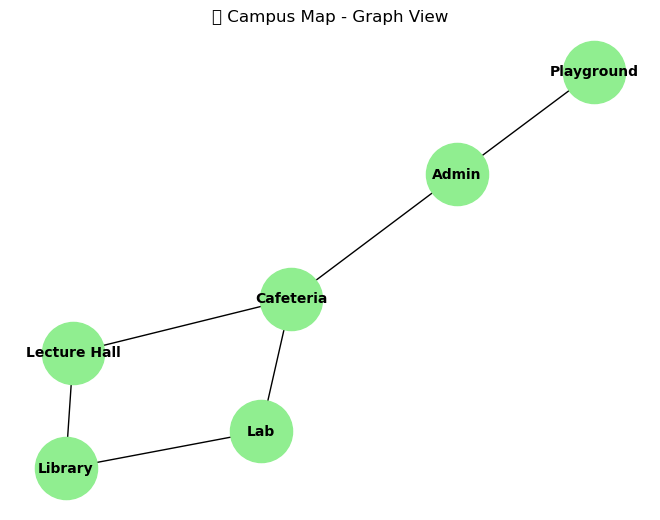

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def show_campus_map(campus):
    G = nx.Graph()

    for place in campus.graph:
        for connected_place in campus.graph[place]:
            G.add_edge(place, connected_place)

    nx.draw(
        G,
        with_labels=True,
        node_color="lightgreen",
        node_size=2000,
        font_weight="bold",
        font_size=10
    )
    plt.title("📍 Campus Map - Graph View")
    plt.show()

show_campus_map(campus)


Find the Shortest Path using BFS
-

In [22]:


# Define start and end locations
start_location = "Library"
end_location = "Playground"

# Find the shortest path
shortest_path = campus.bfs_shortest_path(start_location, end_location)

# Show the result
print(f"📍 Shortest path from {start_location} to {end_location} is:")
print(" ➝ ".join(shortest_path) if shortest_path else "No path found")


📍 Shortest path from Library to Playground is:
Library ➝ Lecture Hall ➝ Cafeteria ➝ Admin ➝ Playground


Find All Possible Paths using DFS
-

In [27]:
start_location = "Library"
end_location = "Playground"

# Find all paths
all_paths = campus.dfs_all_paths(start_location, end_location)

# Display the results
if all_paths:
    print(f"🔎 All possible paths from {start_location} to {end_location}:")
    for i, path in enumerate(all_paths, 1):
        print(f"Path {i}: {' ➝ '.join(path)}")
else:
    print("No paths found.")


🔎 All possible paths from Library to Playground:
Path 1: Library ➝ Lecture Hall ➝ Cafeteria ➝ Admin ➝ Playground
Path 2: Library ➝ Lab ➝ Cafeteria ➝ Admin ➝ Playground



##  Conclusion

In this project, we built a **Campus Navigation System** using the concepts of **Graph Traversal Algorithms**.
